# Introduction

In this report we will be looking at the one dimensional wave equation.

$$
\begin{align}
\frac{\partial^2u}{\partial t^2} = c^2\frac{\partial^2u}{\partial x^2}
\end{align}
$$

We used the inital condition for a standing wave.

$$
\begin{align}
u(x,0) = Asin(\frac{\pi}{L}mx)
\end{align}
$$

The theoredical solution we will be comparing to will be the exact solution

$$
\begin{align}
u_e(x,t) = Asin(\frac{\pi}{L}mx)cos(\frac{\pi}{L}mct)
\end{align}
$$

We will be using an discretization method using the formula

$$
\begin{align}
u_i^{n+1} = -u_i^{n-1}+2u_i^n+C^2(u_{i+1}^n-2u_i^n+u_{i-1}^n)
\end{align}
$$

but we won't be able to figure out the first step (n=1). So we will use another formula

$$
\begin{align}
u_i^1 = u_i^0 - \frac{1}{2}C^2(u_{i+1}^0-2u_i^0+u_{i-1}^0)
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
"""
Kunal Naidu
Wave Equation Assignment
Completed
"""

'\nKunal Naidu\nWave Equation Assignment\nCompleted\n'

In [2]:
class WaveEquation:
    """
    Simulates Wave Equation for 1 dimension
    """
    def __init__(self, L=10, T=4, m=16, A=1, c=2, itterations=1):
        """
        Variable setup

        Parameters
        ----------

        L: Length of Spacial Domain

        T: Length of Time Domain

        m: integer

        A: Amplitude

        itterations: number of time steps created

        x: domain of x values

        t: domain of t values

        c: speed
        """
        # Setting Variables for Initail Condition
        self.L = L
        self.T = T
        self.m = m
        self.A = A
        self.c = c
        self.n = itterations
        # Creating domain for time and x
        self.x = np.linspace(0, L, 100)
        self.t = np.linspace(0, T, 100)

        self.courant_number()
        self.zeroth_step()
        self.first_step()
        self.itterations(itterations)

    def init_cond(self, x):
        """
        initial condition for standing wave
        """
        return self.A * np.sin((np.pi/self.L)*self.m*x)

    def zeroth_step(self):
        """
        creating our inital step using initial condition
        """
        x = self.x.copy()
        u_0 = []
        for i in range(len(x)):
            u_0.append(self.init_cond(x[i]))
        self.u_0 = u_0
        return self

    def courant_number(self):
        """
        calculates courant number

        Returns
        -------

        C: courant number

        C2: courant number squared

        """
        dx = self.x[1]-self.x[0]
        dt = self.t[1]-self.t[0]
        C = self.c*dt/dx
        C2 = C**2
        self.C = C
        self.C2 = C2
        self.dx = dx
        self.dt = dt
        return self

    def first_step(self):
        """
        calculates first step using formula

        $$
        \begin{equation}
        u_i^1 = u_i^0 - \frac{1}{2}C^2(u_{i+1}^0-2u_i^0+u_{i-1}^0)
        \end{equation}
        $$

        """
        u_1 = []
        u_0 = self.u_0.copy()

        # Constant Boundary
        u_1.append(u_0[0])

        # Calculating inbetween values
        for i in range(1, len(u_0)-1):
            u_1.append(u_0[i] -(1/2)*self.C2*(u_0[i+1]-2*u_0[i]+u_0[i-1]))
        u_1.append(u_0[len(u_0)-1])

        # Constant Boundary
        u_1.append(u_0[len(u_0)-1])

        self.u_1 = u_1
        return self

    def stepper(self, u_n, u_nm):
        """
        time steps using equation

        $$
        \begin{equation}
        u_i^{n+1} = -u_i^{n-1}+2u_i^n+C^2(u_{i+1}^n-2u_i^n+u_[i-1]^n)
        \end{equation}
        $$

        Parameters
        ----------

        u_n: current state

        u_nm: previous state

        Returns
        -------

        u_np: next state
        """
        u_np = []

        # Constant Boundary
        u_np.append(u_nm[0])

        # Caculating middle values
        for i in range(1, len(u_nm)-1):
            u_np.append(-u_nm[i]+2*(u_n[i])+self.C2*(u_n[i+1]-2*u_n[i]+u_n[i-1]))

        # Constant Boundary
        u_np.append(u_nm[len(u_nm)-1])

        return u_np

    def itterations(self, itterations):
        """
        itterates stepper for given amount of times while updating u

        Parameters
        ----------

        itterations: number of itterations
        """
        # first step
        u_nm = self.u_0.copy()
        u_n = self.u_1.copy()
        u_np = self.stepper(u_n, u_nm)

        # more than one step
        if itterations > 1:
            for i in range(itterations-1):
                u_n = u_np
                u_nm = u_n
                u_np = self.stepper(u_n, u_nm)
        self.u_np = u_np
        return self

    def theoredical(self):
        """
        theoredical solution
        
        $$
        \begin{align}
        u_e(x,t) = Asin(\frac{\pi}{L}mx)cos(\frac{\pi}{L}mct)
        \end{align}
        $$
        
        """
        A = self.A
        L = self.L
        m = self.m
        c = self.c
        x = self.x
        t = self.dt*self.n

        u_x = []
        for j in x:
            u_x.append(A*np.sin(np.pi*m*j/L)*np.cos(np.pi*m*c*t/L))

        self.analytical = u_x
        return u_x

    def error(self):
        """
        """
        theoredical = self.theoredical()
        u_np = self.u_np

        error = []
        
        #percent error
        for i,j in zip(theoredical,u_np):
            error.append(abs((j-i)/i)*100)
        return error

    def mean_error(self):
        """
        """
        error = self.error()[1:len(self.error())-1]
        mean=0

        for i in error:
            mean += i
        mean /= len(error)

        return mean


In [3]:
def n_plots(itterations):
    """
    shows the calculated wave equation for n
    
    Parameters
    ----------
    
    Itterations: n value
    
    Returns
    -------
    
    Plot of wave equations
    """
    for i in itterations:
        obj = WaveEquation(itterations=int(i))
        plt.plot(obj.x, obj.u_np, label="n "+str(int(i)))
    plt.grid('on')
    plt.title('Calculated Values for Exact Solution')
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.legend(loc=0)
    return

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


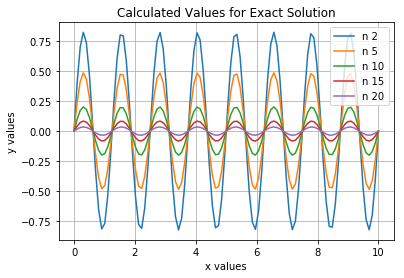

In [4]:
itterations=[2, 5, 10, 15, 20]
n_plots(itterations)

Plotting the calculated solution for different n values. We can see that the amplitude decreases as n increases.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:205: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Percent Error')

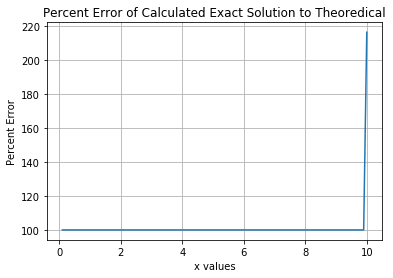

In [5]:
obj_1 = WaveEquation()
obj_2 = WaveEquation(itterations=10)
obj_3 = WaveEquation(itterations=40)

plt.plot(obj_3.x, obj_3.error())
plt.grid('on')
plt.title('Percent Error of Calculated Exact Solution to Theoredical')
plt.xlabel('x values')
plt.ylabel('Percent Error')

In [6]:
obj_1.error()[0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:205: RuntimeWarning: invalid value encountered in double_scalars


nan

When we calculate the percent error when comparing it to the theoredical solution. We get a horizontal line with a huge spike at the end. This is probabily from the fact that at the end points the values are at zero so the percent error will have a zero over zero error. This also explains why the first value was a not a number. So lets take away the first and the last value to help us better see whats happening. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:205: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Percent Error')

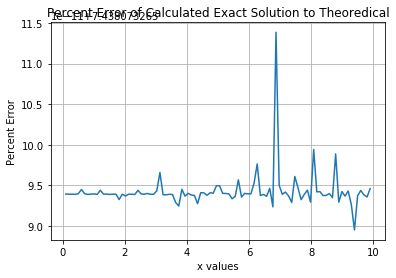

In [7]:
plt.plot(obj_1.x[:len(obj_1.x)-1], obj_1.error()[:len(obj_1.x)-1])
plt.grid('on')
plt.title('Percent Error of Calculated Exact Solution to Theoredical')
plt.xlabel('x values')
plt.ylabel('Percent Error')

Now we can see that there is some variation in the percent error for the values. Now we will take the mean of these percent errors to be able to see if there are any trends when varying the courant number or the n value.

In [8]:
def n_error(itterations):
    """
    Calculates the mean error as the time increases 
    """
    error = []
    time = []
    for i in itterations:
        obj = WaveEquation(itterations=int(i))
        error.append(obj.mean_error())
        time.append(i*obj.dt)
    return time, error


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:205: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Mean Percent Error')

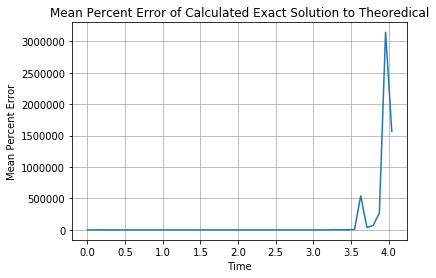

In [9]:
itterations=np.linspace(0,100,50)
error = n_error(itterations)
plt.plot(error[0], error[1])
plt.grid('on')
plt.title('Mean Percent Error of Calculated Exact Solution to Theoredical')
plt.xlabel('Time')
plt.ylabel('Mean Percent Error')

When looking at the mean percent error over time we can see that around time 3.5 the percent error spikes up and continues to increase. This shows that theres a certain amount of itterations where this method is accurate. Next we will look at the values before time 3.5 to see if they actually make a straight line. 

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Mean Percent Error')

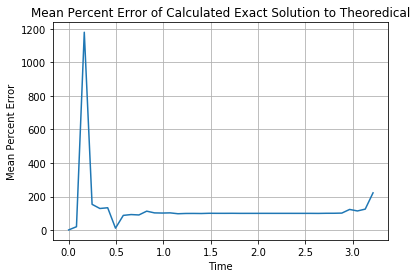

In [10]:
plt.plot(error[0][:40], error[1][:40])
plt.grid('on')
plt.title('Mean Percent Error of Calculated Exact Solution to Theoredical')
plt.xlabel('Time')
plt.ylabel('Mean Percent Error')

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


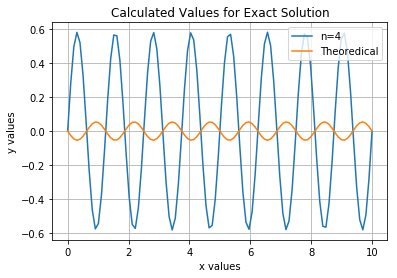

In [11]:
obj_4 = WaveEquation(itterations=4)
plt.plot(obj_4.x, obj_4.u_np, label="n=4")
plt.plot(obj_4.x, obj_4.theoredical(), label="Theoredical")
plt.grid('on')
plt.title('Calculated Values for Exact Solution')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(loc=0)

We can see that the mean percent error is somewhat constant excluding at n=4. We can see we have a 1200% percent error. When we look at the graphs comparing n=4 to the theoredical. We can see that the theoredical has a much smaller amplitude and also is shifted horizontally.

In [12]:
def vary_courant(courant, itterations):
    """
    varies the courant value for a certain n value
    
    Parameters
    ----------
    
    courant: list of courant values 
    
    itterations: n value
    
    Returns
    -------
    
    x: list of x values 
    
    np: values for the solution
    
    error: error of the solution
    
    """
    x=[]
    np=[]
    error=[]
    for i in courant:
        obj_5 = WaveEquation(itterations=itterations)
        obj_5.C = i
        obj_5.C2 = i**2
        obj_5.zeroth_step()
        obj_5.first_step()
        obj_5.itterations(itterations=itterations)
        x.append(obj_5.x)
        np.append(obj_5.u_np)
        error.append(obj_5.mean_error())
        
    return  x, np, error


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:205: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


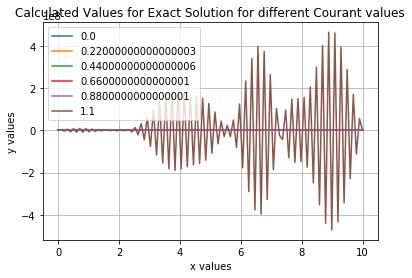

In [13]:
itterations = 40
courant = np.linspace(0, 1.1, 6)
a = vary_courant(courant, itterations)
for i, j, k in zip(a[0], a[1], courant):
    plt.plot(i, j, label=str(k))
plt.grid('on')
plt.title('Calculated Values for Exact Solution for different Courant values')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(loc=0)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


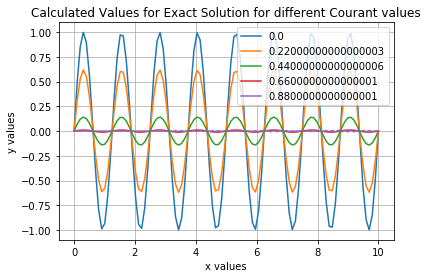

In [14]:
for i, j, k in zip(a[0][:-1], a[1][:-1], courant[:-1]):
    plt.plot(i, j, label=str(k))

plt.grid('on')
plt.title('Calculated Values for Exact Solution for different Courant values')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(loc=0)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.


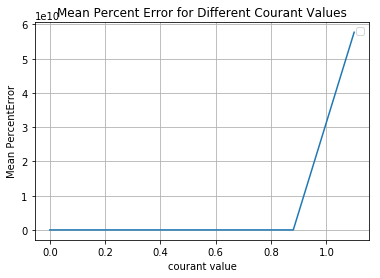

In [15]:
plt.plot(courant, a[2])
plt.grid('on')
plt.title('Mean Percent Error for Different Courant Values')
plt.xlabel('courant value')
plt.ylabel('Mean PercentError')
plt.legend(loc=0)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.


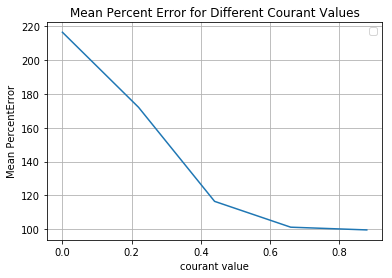

In [16]:
plt.plot(courant[:-1], a[2][:-1])
plt.grid('on')
plt.title('Mean Percent Error for Different Courant Values')
plt.xlabel('courant value')
plt.ylabel('Mean PercentError')
plt.legend(loc=0)

The courant value is a value which can vary depending on dt, dx and the speed. We can see that as the courant value increases the amplitude of the wave decreses. Until a point where the shape of the wave changes and the solution turns into something completely different. The first graph shows us how at courant value 1.1 the exact solution changes into something completely different as isn't similar to anything before. The second graph ommits the courant value of 1.1 and we can see that the solution converges closer to the theoredical graph and then increases.

In [17]:
def break_value(itteration):
    """
    calculates the point where the mean error is larger than 10,000
    
    Parameter
    ----------
    
    itteration: n value 
    
    Returns
    -------
    
    np: courant value where the mean error is larger than 10,000
    """
    np=[]
    for i in itteration:
        courant = 0.5
        obj = WaveEquation(itterations=int(i))
        obj.C = courant
        obj.C2 = courant**2
        obj.zeroth_step()
        obj.first_step()
        obj.itterations(itterations=int(i))
        
        while obj.mean_error() < 10000:
            courant += 0.01
            obj.C = courant
            obj.C2 = courant**2
            obj.zeroth_step()
            obj.first_step()
            obj.itterations(itterations=int(i))
        np.append(courant)
    return np


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:205: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'courant')

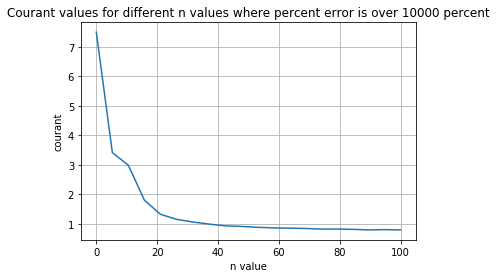

In [18]:
itterations = np.linspace(0,100,20)
a = break_value(itterations)
plt.plot(itterations, a)
plt.grid('on')
plt.title('Courant values for different n values where percent error is over 10000 percent')
plt.xlabel('n value')
plt.ylabel('courant')


Now we will look at the courant value where the graph changes and the mean percent error significantly increases. I did this by taking a specific n value or time step and increasing the courant value while calculating the mean percent error. When the percent error is higher than 10,000 than the courant value was recorded. 10,000 was chosen with taking in mind from how previously we saw a random spike of the mean percent error at n=4 although the graph was fine. Although with a percent error at 10,000 might not be the point where the graph gets all weird. But it is a point where we can be confident that it has that alternate shape and still be able to compare the different n values.

When actually looking at the n values compared to the courant values we can see that at smaller n values the courant value can be pretty high but as the n values get larger the courant values have something have similar to a exponential decay. As the n values get really large we notice that the courant value must be smaller than 1. this would mean that dt must be smaller than dx.

The reason for this decay is because as we get higher n, the following formula is used more and more.

$$
\begin{align}
u_i^{n+1} = -u_i^{n-1}+2u_i^n+C^2(u_{i+1}^n-2u_i^n+u_{i-1}^n)
\end{align}
$$

This formula uses the courant value and the more the formula is used the more effect the courant value has.

# Conclusion

In this report we looked at the one dimensional wave equation. Where we looked at a discretization method where we replaced continous derivatives with discrete differences. We compared our solution to a theoredical solution and varied parameters like the time step and courant value to see what effect it has to both the mean percent error and the actual wave itself.